# Ashrut Alok Arora - 210968206
# Week 3 code

## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

import keras
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense

2023-09-04 09:46:35.290869: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-04 09:46:35.315449: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-04 09:46:35.664152: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Q1) Understanding the Dataset and Pre-processing: Implement the following:

#### Loading the MNIST Fashion Dataset

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

#### Understanding the Data

In [3]:
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [4]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### a) Compute and display the number of classes

In [5]:
print("Number of classes = ",len(np.unique(y_train)))

Number of classes =  10


#### Plotting the Data

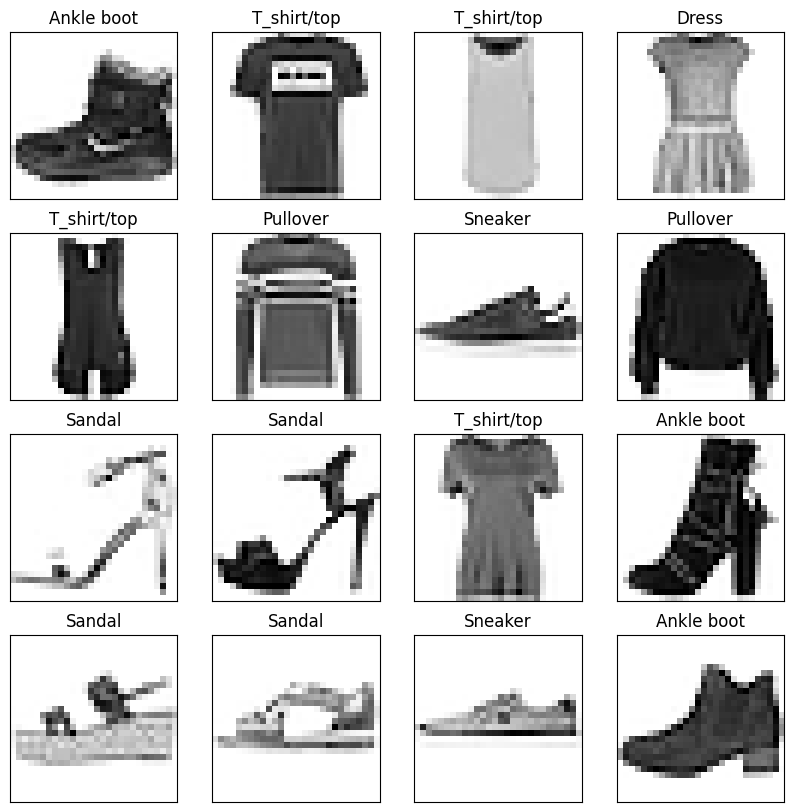

In [6]:
plt.figure(figsize=(10, 10))

for i in range(16):
    
    plt.subplot(4, 4, i + 1)

    # Xticks and Yticks are empty as we dont want any scale
    plt.xticks([])
    plt.yticks([])

    # We dont want a grid on our img
    plt.grid(False)

    # Displays the image
    plt.imshow(X_train[i].reshape((28,28)) , cmap="Greys")

    # Provides the correct label for our image
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
    
plt.show()

### b) Compute and display the dimensions of each image.

In [7]:
image_height, image_width = X_train.shape[1], X_train.shape[2]

print("Image dimensions:", image_height, "x", image_width)

Image dimensions: 28 x 28


### c) Displaying 1 image from each class

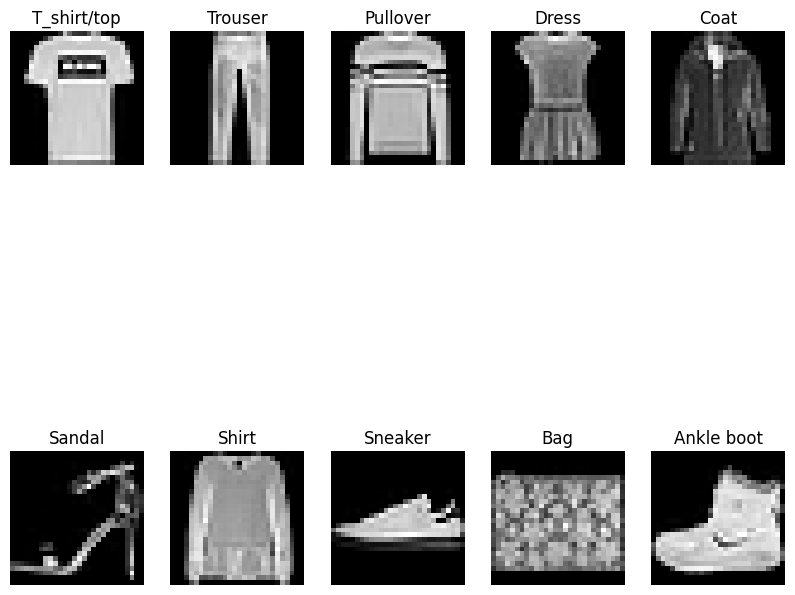

In [8]:
plt.figure(figsize=(10, 10))

for i in range(10):

    idx = np.where(y_train == i)[0][0]
    
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[idx], cmap='gray')
    plt.title(class_names[i])
    plt.axis('off')

plt.show()

### d) Normalizing the data

In [9]:
X_train = X_train/255
X_test = X_test/255

#### Splitting the data in Train and Test 

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state= 224)

## FCNN Building

In [52]:
fcnn = keras.models.Sequential([
    
    keras.layers.Flatten(input_shape=[28, 28, 1]),
    
    # Fully connected layers
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=32, activation='relu'),
    # keras.layers.Dense(units=16, activation='relu'),
    
    # Output Layer
    keras.layers.Dense(units=10, activation='softmax')
])

fcnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 10)                330       
                                                                 
Total params: 111146 (434.16 KB)
Trainable params: 111146 (434.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
fcnn.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [54]:
history = fcnn.fit(X_train, y_train, epochs=10, batch_size = 32, validation_split=0.1)

Epoch 1/10
1350/1350 [==============================] - 2s 1ms/step - loss: 0.5423 - accuracy: 0.8075 - val_loss: 0.4067 - val_accuracy: 0.8567
Epoch 2/10
1350/1350 [==============================] - 1s 1ms/step - loss: 0.3894 - accuracy: 0.8582 - val_loss: 0.3829 - val_accuracy: 0.8637
Epoch 3/10
1350/1350 [==============================] - 1s 991us/step - loss: 0.3487 - accuracy: 0.8717 - val_loss: 0.3576 - val_accuracy: 0.8696
Epoch 4/10
1350/1350 [==============================] - 1s 1ms/step - loss: 0.3265 - accuracy: 0.8803 - val_loss: 0.3425 - val_accuracy: 0.8760
Epoch 5/10
1350/1350 [==============================] - 1s 1ms/step - loss: 0.3068 - accuracy: 0.8863 - val_loss: 0.3547 - val_accuracy: 0.8737
Epoch 6/10
1350/1350 [==============================] - 1s 1ms/step - loss: 0.2909 - accuracy: 0.8934 - val_loss: 0.3498 - val_accuracy: 0.8746
Epoch 7/10
1350/1350 [==============================] - 1s 1ms/step - loss: 0.2784 - accuracy: 0.8965 - val_loss: 0.3535 - val_accurac

In [55]:
print("Accuracy = " ,fcnn.evaluate(X_test, y_test)[1])

375/375 [==============================] - 0s 616us/step - loss: 0.3228 - accuracy: 0.8855
Accuracy =  0.8855000138282776


### Plotting the performance curves.

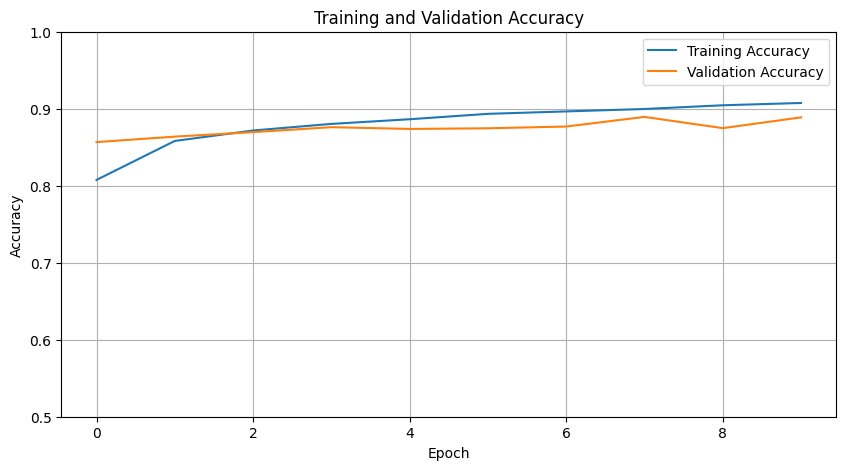

In [56]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend()
plt.grid()
plt.show()

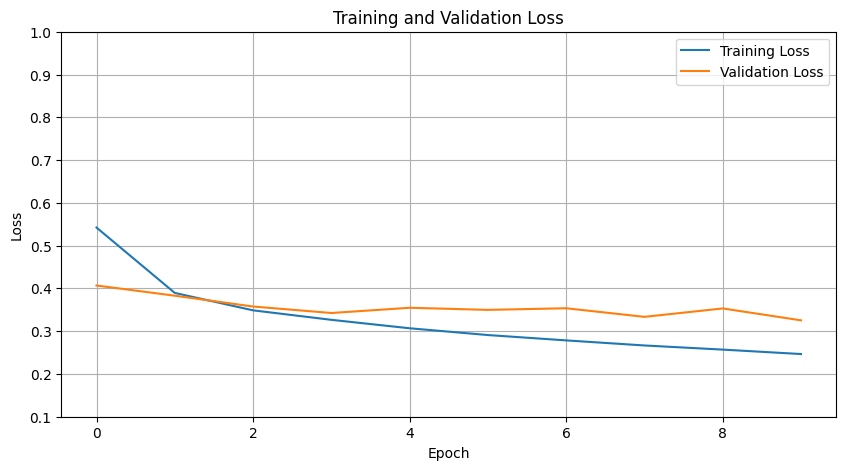

In [57]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.1,1])
plt.legend()
plt.grid()
plt.show()

#### Our model is not overfitting and has good test and train accuracy

## CNN1 Model Building

In [75]:
cnn1 = keras.models.Sequential([
    
    # Convolution Layer
    keras.layers.Conv2D(filters = 32, kernel_size = 5, strides= (1,1), padding ='valid', activation ='relu', input_shape = [28,28,1]),
    
    # Max Pooling Layer
    keras.layers.MaxPooling2D(pool_size = (2,2), strides=(2, 2)),
    
    # Flattening the Layer
    keras.layers.Flatten(),
    
    # Building Neural Network
    keras.layers.Dense(units = 100, activation = 'relu'),
    
    # Output Layer
    keras.layers.Dense(units = 10, activation = 'softmax'),
    
])

cnn1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 4608)              0         
                                                                 
 dense_14 (Dense)            (None, 100)               460900    
                                                                 
 dense_15 (Dense)            (None, 10)                1010      
                                                                 
Total params: 462742 (1.77 MB)
Trainable params: 462742 (1.77 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [76]:
cnn1.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [77]:
history1 = cnn1.fit(X_train, y_train, epochs=8, batch_size = 32, verbose= 1, validation_split=0.1)

Epoch 1/8
1350/1350 [==============================] - 2s 1ms/step - loss: 0.4422 - accuracy: 0.8446 - val_loss: 0.3471 - val_accuracy: 0.8775
Epoch 2/8
1350/1350 [==============================] - 1s 1ms/step - loss: 0.3058 - accuracy: 0.8909 - val_loss: 0.3248 - val_accuracy: 0.8825
Epoch 3/8
1350/1350 [==============================] - 1s 1ms/step - loss: 0.2586 - accuracy: 0.9052 - val_loss: 0.2718 - val_accuracy: 0.9065
Epoch 4/8
1350/1350 [==============================] - 1s 1ms/step - loss: 0.2248 - accuracy: 0.9173 - val_loss: 0.2827 - val_accuracy: 0.9000
Epoch 5/8
1350/1350 [==============================] - 1s 1ms/step - loss: 0.1969 - accuracy: 0.9260 - val_loss: 0.2640 - val_accuracy: 0.9079
Epoch 6/8
1350/1350 [==============================] - 1s 1ms/step - loss: 0.1727 - accuracy: 0.9362 - val_loss: 0.2830 - val_accuracy: 0.9040
Epoch 7/8
1350/1350 [==============================] - 1s 1ms/step - loss: 0.1525 - accuracy: 0.9431 - val_loss: 0.2883 - val_accuracy: 0.9013

### Testing the model

In [78]:
print("Accuracy = " ,cnn1.evaluate(X_test, y_test)[1])

375/375 [==============================] - 0s 682us/step - loss: 0.2636 - accuracy: 0.9102
Accuracy =  0.9101666808128357


### Visualizing the Performance Curves

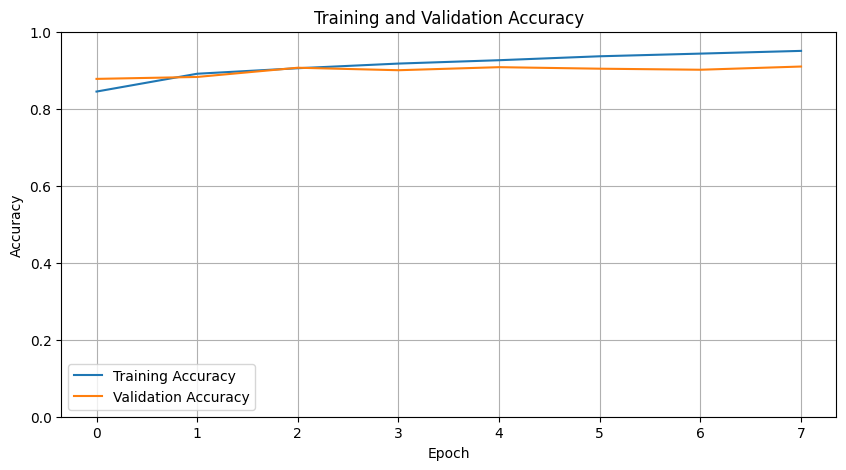

In [79]:
plt.figure(figsize=(10, 5))
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend()
plt.grid()
plt.show()

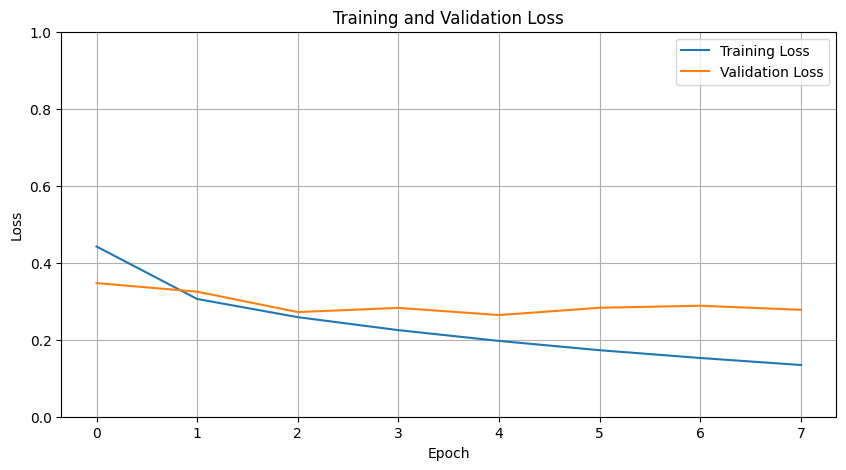

In [94]:
plt.figure(figsize=(10, 5))
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0,1])
plt.legend()
plt.grid()
plt.show()

## CNN2 Model Building

In [101]:
cnn2 = keras.models.Sequential([
    
    # Convolution Layer
    keras.layers.Conv2D(filters = 32, kernel_size = 3, strides= (1,1), padding ='valid', activation ='relu', input_shape = [28,28,1]),
    keras.layers.Conv2D(filters = 32, kernel_size = 3, strides= (1,1), padding ='valid', activation ='relu', input_shape = [28,28,1]),

    # Max Pooling Layer
    keras.layers.MaxPooling2D(pool_size = (2,2), strides=(2, 2)),
    
    # Flattening the Layer
    keras.layers.Flatten(),
    
    # Building Neural Network
    keras.layers.Dense(units = 100, activation = 'relu'),
    
    # Output Layer
    keras.layers.Dense(units = 10, activation = 'softmax'),
    
])

cnn2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 4608)              0         
                                                                 
 dense_22 (Dense)            (None, 100)               460900    
                                                                 
 dense_23 (Dense)            (None, 10)                1010      
                                                      

In [102]:
cnn2.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [103]:
history2 = cnn2.fit(X_train, y_train, epochs=7, batch_size = 32, verbose= 1, validation_split=0.1)

Epoch 1/7
1350/1350 [==============================] - 2s 1ms/step - loss: 0.4134 - accuracy: 0.8534 - val_loss: 0.3127 - val_accuracy: 0.8890
Epoch 2/7
1350/1350 [==============================] - 2s 1ms/step - loss: 0.2663 - accuracy: 0.9036 - val_loss: 0.2683 - val_accuracy: 0.9035
Epoch 3/7
1350/1350 [==============================] - 2s 1ms/step - loss: 0.2140 - accuracy: 0.9210 - val_loss: 0.2583 - val_accuracy: 0.9048
Epoch 4/7
1350/1350 [==============================] - 2s 1ms/step - loss: 0.1738 - accuracy: 0.9351 - val_loss: 0.2537 - val_accuracy: 0.9125
Epoch 5/7
1350/1350 [==============================] - 2s 1ms/step - loss: 0.1401 - accuracy: 0.9474 - val_loss: 0.2797 - val_accuracy: 0.9142
Epoch 6/7
1350/1350 [==============================] - 2s 1ms/step - loss: 0.1102 - accuracy: 0.9585 - val_loss: 0.2988 - val_accuracy: 0.9119
Epoch 7/7
1350/1350 [==============================] - 2s 1ms/step - loss: 0.0867 - accuracy: 0.9675 - val_loss: 0.2849 - val_accuracy: 0.9115

### Visualizing the Performance Curves

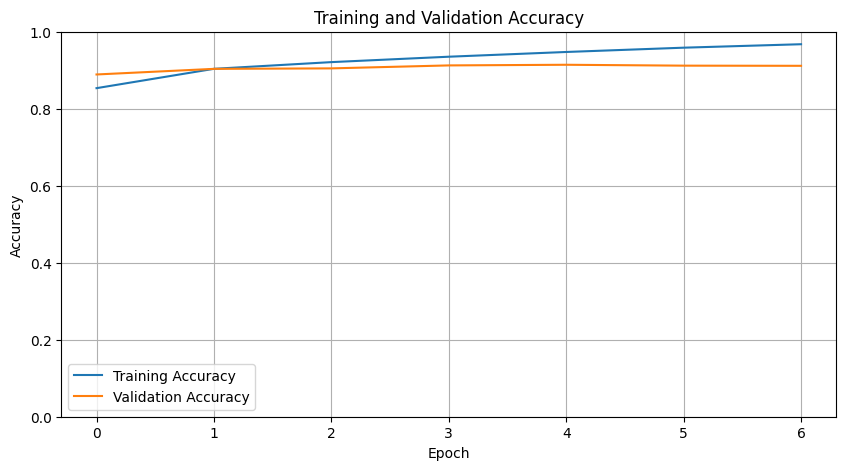

In [105]:
plt.figure(figsize=(10, 5))
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend()
plt.grid()
plt.show()

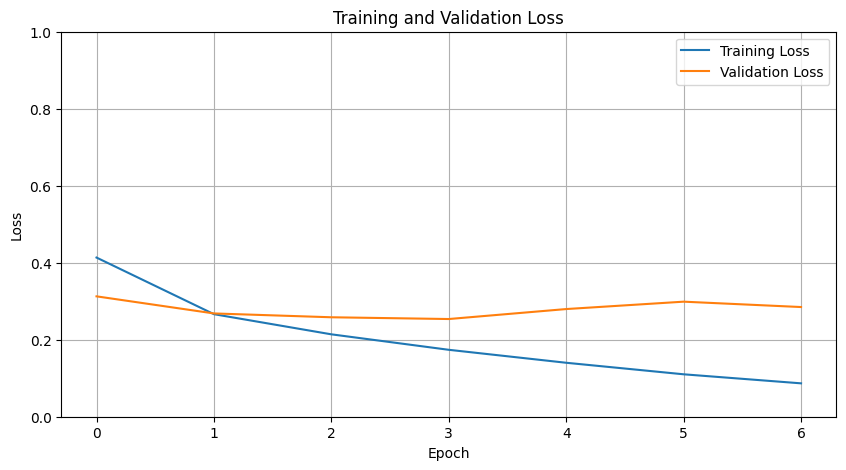

In [106]:
plt.figure(figsize=(10, 5))
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0,1])
plt.legend()
plt.grid()
plt.show()

In [107]:
print("Accuracy = " ,cnn2.evaluate(X_test, y_test)[1])

375/375 [==============================] - 0s 694us/step - loss: 0.2788 - accuracy: 0.9135
Accuracy =  0.9135000109672546


## CNN1 vs CNN2

CNN2 performs slightly better than CNN1
96% accuracy vs 94% accuracy on training set


## FCNN vs CNN


#### Number of parameters comparison
471478(CNN) vs 109386(FCNN) = CNN has more parameters

#### CNN performs way better than FCNN
96% accuracy vs 91% accuracy on training set

#### CNN takes way more time for computation 
CNNs take more time for computation than normal neural networks due to their use of convolutional layers, pooling layers, and their specialization for processing high-dimensional image data with spatial relationships.
